### Parte 2 - potencial periódico.

--- Exercício 1: Hamiltoniano Tridiagonal ---


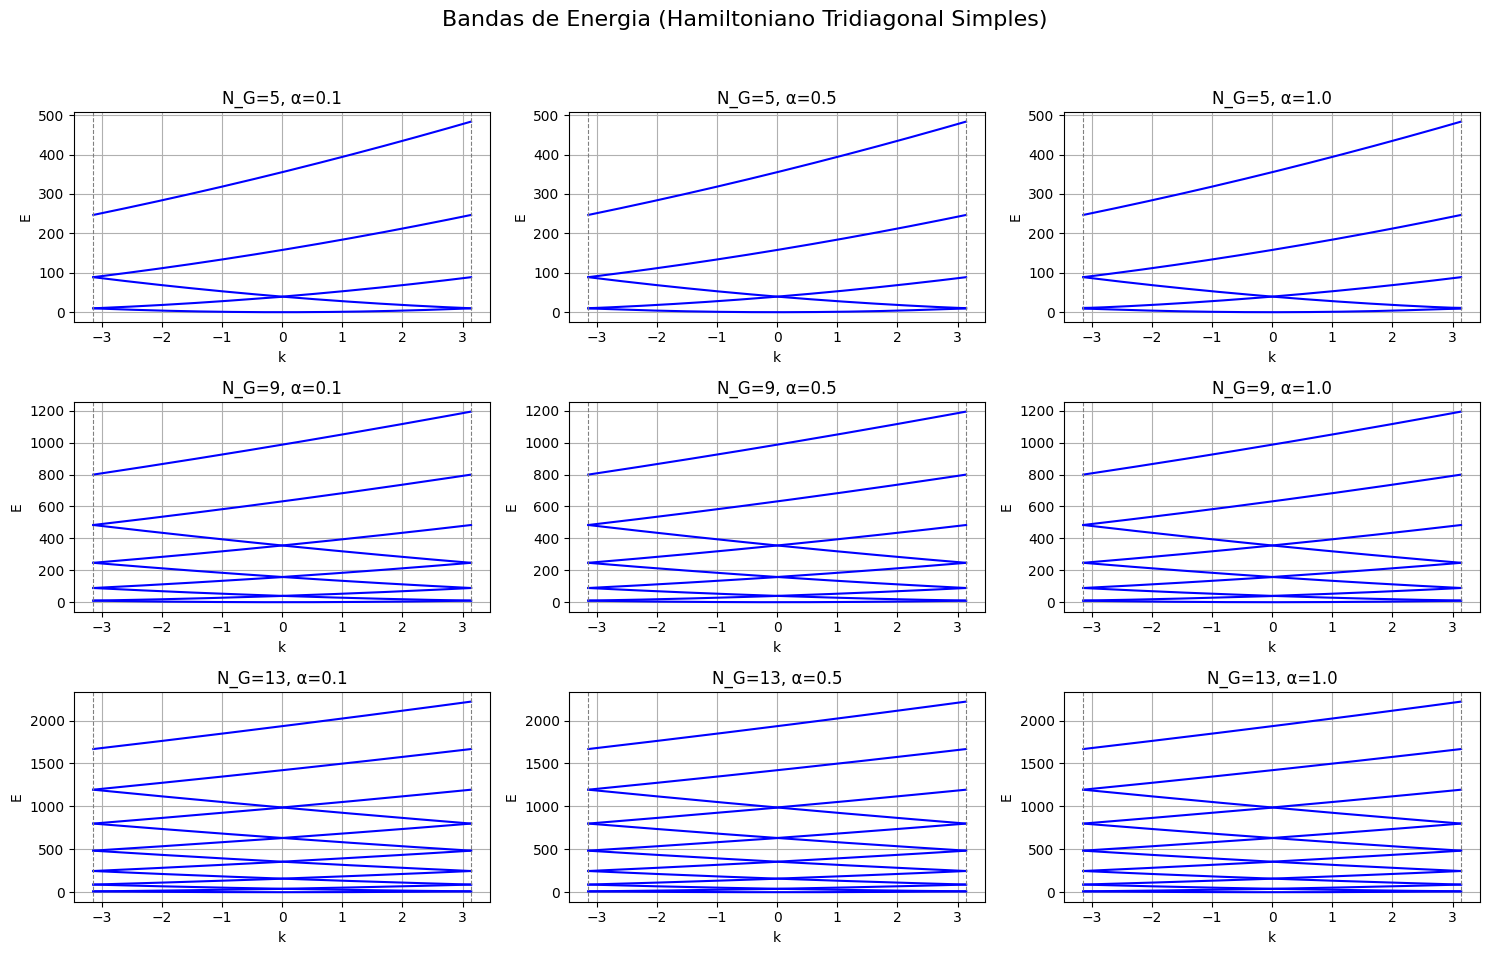


--- Visualização Aproximada da Figura 9.4 (Ashcroft & Mermin) ---
Parâmetros: α=0.5, α_diag2=0.15, α_diag3=0.05, N_G=11


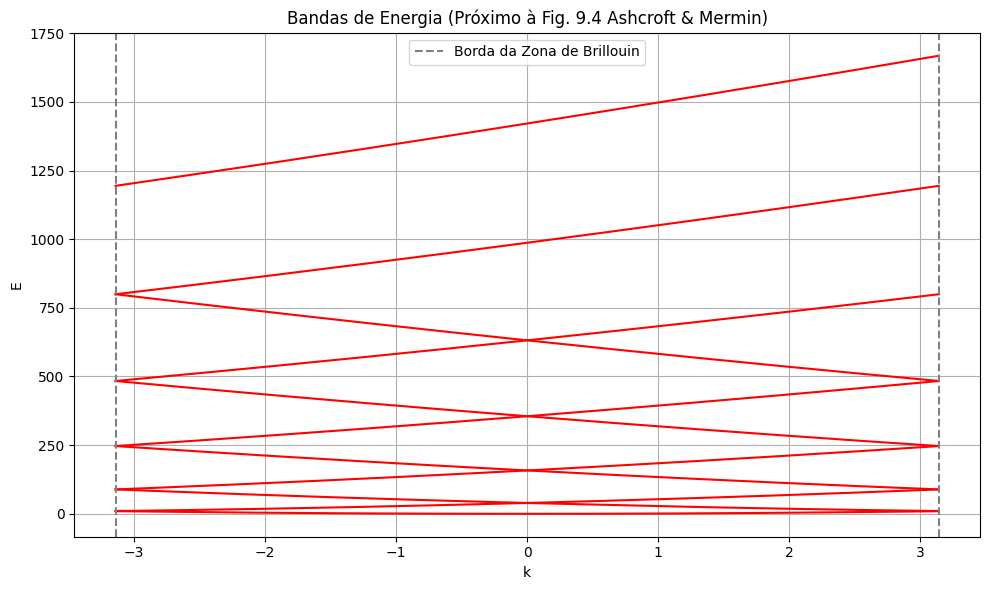

In [14]:
import numpy as np # Para operações numéricas, especialmente com matrizes
import matplotlib.pyplot as plt # Para criar gráficos
from scipy.integrate import quad # Para integração numérica, usaremos para calcular os coeficientes de Fourier



def calculate_bands_tridiagonal(k_points, alpha, num_G, alpha_diag2=0, alpha_diag3=0):
    """
    Calcula as bandas de energia para o Hamiltoniano tridiagonal (e variantes com mais diagonais).

    Args:
        k_points (array): Pontos de k na primeira Zona de Brillouin.
        alpha (float): Constante de acoplamento para a diagonal principal (vizinhos diretos).
        num_G (int): Número de vetores G a serem considerados (determina o tamanho da matriz).
        alpha_diag2 (float): Constante de acoplamento para a segunda diagonal (G_n e G_{n+/-2}).
        alpha_diag3 (float): Constante de acoplamento para a terceira diagonal (G_n e G_{n+/-3}).

    Returns:
        list: Lista de arrays, onde cada array contém os valores de energia para uma banda.
    """
    all_bands = []
    # Inicializa uma lista para cada banda de energia que vamos calcular
    for _ in range(num_G):
        all_bands.append([])

    # Define os índices G para centralizar em torno de 0. Ex: para num_G=5, G_indices = [-2, -1, 0, 1, 2]
    G_indices = np.arange(-num_G // 2, num_G - num_G // 2)

    # Itera sobre cada ponto k na Zona de Brillouin
    for k in k_points:
        # Cria uma matriz de zeros para o Hamiltoniano. Usamos dtype=complex por segurança,
        # embora neste caso os valores sejam reais.
        H = np.zeros((num_G, num_G), dtype=complex)

        # Preenche a matriz Hamiltoniana
        for i in range(num_G):
            G_i = 2 * np.pi * G_indices[i] # Calcula o valor de G para o índice atual

            # Termo diagonal: energia cinética
            H[i, i] = (k - G_i)**2

            # Acoplamento com vizinhos diretos (diagonal adjacente: G_n e G_{n+/-1})
            if i + 1 < num_G:
                H[i, i + 1] = alpha
                H[i + 1, i] = alpha # Matriz Hermitiana (simétrica para valores reais)

            # Acoplamento com vizinhos de segunda ordem (diagonal mais afastada: G_n e G_{n+/-2})
            if alpha_diag2 != 0:
                if i + 2 < num_G:
                    H[i, i + 2] = alpha_diag2
                    H[i + 2, i] = alpha_diag2

            # Acoplamento com vizinhos de terceira ordem (G_n e G_{n+/-3})
            if alpha_diag3 != 0:
                if i + 3 < num_G:
                    H[i, i + 3] = alpha_diag3
                    H[i + 3, i] = alpha_diag3

        # Diagonaliza a matriz para encontrar os autovalores (energias)
        # eigvalsh é mais eficiente para matrizes Hermitianas (simétricas reais)
        eigenvalues = np.linalg.eigvalsh(H)

        # Ordena os autovalores para que as bandas sejam plotadas de forma contínua
        eigenvalues.sort()

        # Adiciona os autovalores às respectivas bandas
        for i, val in enumerate(eigenvalues):
            all_bands[i].append(val)

    return all_bands

# --- Parâmetros para o Exercício 1 ---
k_points_ex1 = np.linspace(-np.pi, np.pi, 200) # Pontos de k na 1ª Zona de Brillouin
num_G_values_ex1 = [5, 9, 13] # Diferentes números de ondas planas (afeta o número de bandas)
alpha_values_ex1 = [0.1, 0.5, 1.0] # Diferentes intensidades do potencial

print("--- Exercício 1: Hamiltoniano Tridiagonal ---")

# --- Plotando os resultados: Apenas acoplamento tridiagonal (alpha) ---
plt.figure(figsize=(15, 10)) # Tamanho maior para múltiplos subplots
plt.suptitle('Bandas de Energia (Hamiltoniano Tridiagonal Simples)', fontsize=16)

for j, num_G in enumerate(num_G_values_ex1):
    for i, alpha in enumerate(alpha_values_ex1):
        # Cria um subplot para cada combinação de num_G e alpha
        ax = plt.subplot(len(num_G_values_ex1), len(alpha_values_ex1), j * len(alpha_values_ex1) + i + 1)

        # Calcula as bandas
        bands = calculate_bands_tridiagonal(k_points_ex1, alpha, num_G)

        # Plota cada banda
        for band in bands:
            ax.plot(k_points_ex1, band, color='blue')

        ax.set_title(f'N_G={num_G}, α={alpha:.1f}')
        ax.set_xlabel('k')
        ax.set_ylabel('E')
        ax.grid(True)
        # Adiciona linhas pontilhadas nas bordas da Zona de Brillouin
        ax.axvline(x=np.pi, color='gray', linestyle='--', linewidth=0.8)
        ax.axvline(x=-np.pi, color='gray', linestyle='--', linewidth=0.8)

plt.tight_layout(rect=[0, 0.03, 1, 0.95]) # Ajusta o layout para evitar sobreposição
plt.show()

# --- Plotando para se aproximar da Figura 9.4 (Ashcroft & Mermin) ---
# Para simular a Figura 9.4, precisamos de acoplamentos além da primeira diagonal.
# Isso sugere que o potencial V(x) tem harmônicos de Fourier de ordem superior.
# Ajuste estes valores de 'alpha_diag2' e 'alpha_diag3' para ver o efeito.
alpha_main_fig94 = 0.5
alpha_secondary_fig94 = 0.15 # Acoplamento para G_n e G_{n+/-2}
alpha_tertiary_fig94 = 0.05  # Acoplamento para G_n e G_{n+/-3}
num_G_fig94 = 11 # Um número maior de Gs para mais bandas

print("\n--- Visualização Aproximada da Figura 9.4 (Ashcroft & Mermin) ---")
print(f"Parâmetros: α={alpha_main_fig94}, α_diag2={alpha_secondary_fig94}, α_diag3={alpha_tertiary_fig94}, N_G={num_G_fig94}")

plt.figure(figsize=(10, 6))
bands_fig94 = calculate_bands_tridiagonal(k_points_ex1, alpha_main_fig94, num_G_fig94,
                                          alpha_diag2=alpha_secondary_fig94,
                                          alpha_diag3=alpha_tertiary_fig94)
for band in bands_fig94:
    plt.plot(k_points_ex1, band, color='red')

plt.title('Bandas de Energia (Próximo à Fig. 9.4 Ashcroft & Mermin)')
plt.xlabel('k')
plt.ylabel('E')
plt.axvline(x=np.pi, color='gray', linestyle='--', label='Borda da Zona de Brillouin')
plt.axvline(x=-np.pi, color='gray', linestyle='--')
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()

In [15]:
# --- Definição das Funções de Potencial V(x) ---
def V_x_cosine(x, A):
    """Potencial Cosseno: V(x) = A * cos(2πx)
    É naturalmente periódica com R=1.
    """
    return A * np.cos(2 * np.pi * x)

def V_x_gaussian_single(x, A, gamma):
    """Potencial Gaussiana Única: V(x) = -A * exp[-x^2 / (2γ^2)]
    Consideramos a parte periódica do potencial, onde a gaussiana está centrada na célula unitária.
    A integração de 0 a 1 captura o coeficiente de Fourier desta periodicidade.
    """
    # Para garantir que a gaussiana esteja centrada na célula unitária para a integração
    # e visualização, podemos modular x.
    x_effective = (x + 0.5) % 1 - 0.5 # Mapeia x para o intervalo [-0.5, 0.5)
    return -A * np.exp(-(x_effective**2) / (2 * gamma**2))

def V_x_gaussian_double(x, A, B, gamma):
    """Potencial Dupla Gaussiana: V(x) = -A * exp[-(x-1/4)^2 / (2γ^2)] - B * exp[-(x+1/4)^2 / (2γ^2)]
    Similar à gaussiana única, garantimos a periodicidade.
    """
    x_effective = x % 1 # Mapeia x para o intervalo [0, 1)

    # A primeira gaussiana centrada em 0.25
    term1 = -A * np.exp(-((x_effective - 0.25)**2) / (2 * gamma**2))

    # A segunda gaussiana centrada em -0.25.
    # Para ser periódica em [0,1], se a base estiver em -0.25,
    # sua repetição estará em 0.75 na próxima célula.
    term2 = -B * np.exp(-((x_effective + 0.25 - 1)**2) / (2 * gamma**2)) if x_effective < 0.5 else \
            -B * np.exp(-((x_effective + 0.25)**2) / (2 * gamma**2))

    # O cálculo dos coeficientes de Fourier lida com a periodicidade.
    # Para plotagem, o "x_effective" já nos ajuda a ver a forma.
    # A integração é sempre de 0 a 1.
    return term1 + term2

In [16]:
def calculate_V_mn(V_func, num_G, *args):
    """
    Calcula os elementos V_m,n da matriz de potencial usando integração numérica.

    Args:
        V_func (function): Função de potencial V(x).
        num_G (int): Número de vetores G a serem considerados.
        *args: Argumentos adicionais para V_func (ex: A, gamma).

    Returns:
        numpy.ndarray: Matriz V_mn.
    """
    V_mn_matrix = np.zeros((num_G, num_G), dtype=complex)

    # Define os índices G para centralizar em torno de 0. Ex: para num_G=5, G_indices = [-2, -1, 0, 1, 2]
    G_indices = np.arange(-num_G // 2, num_G - num_G // 2)

    for m_idx in range(num_G):
        for n_idx in range(num_G):
            # Diferença de G: G_m - G_n
            G_diff_val = 2 * np.pi * (G_indices[m_idx] - G_indices[n_idx])

            # A função a ser integrada para obter V_mn
            # V_func(x, *args) é o potencial, e exp(...) é o termo de Fourier
            integrand = lambda x: V_func(x, *args) * np.exp(-1j * G_diff_val * x)

            # Realiza a integração numérica de 0 a 1.
            # quad retorna uma tupla (resultado_integral, erro_estimado). Pegamos o resultado.
            real_part = quad(lambda x: np.real(integrand(x)), 0, 1)[0]
            imag_part = quad(lambda x: np.imag(integrand(x)), 0, 1)[0]

            V_mn_matrix[m_idx, n_idx] = real_part + 1j * imag_part
    return V_mn_matrix

In [17]:
def calculate_bands_from_Vmn(k_points, V_mn_matrix, num_G):
    """
    Calcula as bandas de energia usando a matriz V_mn calculada.

    Args:
        k_points (array): Pontos de k na primeira Zona de Brillouin.
        V_mn_matrix (numpy.ndarray): Matriz V_mn do potencial.
        num_G (int): Número de vetores G (tamanho da matriz).

    Returns:
        list: Lista de arrays, onde cada array contém os valores de energia para uma banda.
    """
    all_bands = []
    for _ in range(num_G):
        all_bands.append([])

    # Define os vetores G para o termo cinético (precisa ser consistente com V_mn_matrix)
    G_indices = np.arange(-num_G // 2, num_G - num_G // 2)
    G_values = 2 * np.pi * G_indices

    for k in k_points:
        H = np.zeros((num_G, num_G), dtype=complex)

        # Preenche a diagonal com o termo cinético
        for i in range(num_G):
            H[i, i] = (k - G_values[i])**2

        # Adiciona a matriz V_mn (que contém os termos de potencial fora da diagonal)
        H += V_mn_matrix

        # Diagonaliza a matriz para encontrar os autovalores (energias)
        eigenvalues = np.linalg.eigvalsh(H)

        # Ordena os autovalores para que as bandas sejam contínuas no gráfico
        eigenvalues.sort()

        for i, val in enumerate(eigenvalues):
            all_bands[i].append(val)

    return all_bands


--- Exercício 2: Cálculo das Bandas com V(x) Genérico ---

### Potencial: V(x) = A cos(2πx) ###


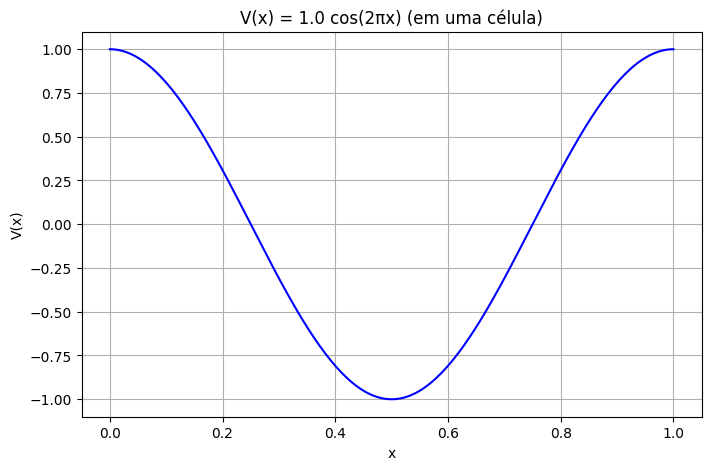


Matriz V_mn (parte real, arredondada) para V(x) = A cos(2πx):
[[ 0.   0.5 -0.  -0.  -0.   0.  -0.  -0.  -0. ]
 [ 0.5  0.   0.5 -0.  -0.  -0.   0.  -0.  -0. ]
 [-0.   0.5  0.   0.5 -0.  -0.  -0.   0.  -0. ]
 [-0.  -0.   0.5  0.   0.5 -0.  -0.  -0.   0. ]
 [-0.  -0.  -0.   0.5  0.   0.5 -0.  -0.  -0. ]
 [ 0.  -0.  -0.  -0.   0.5  0.   0.5 -0.  -0. ]
 [-0.   0.  -0.  -0.  -0.   0.5  0.   0.5 -0. ]
 [-0.  -0.   0.  -0.  -0.  -0.   0.5  0.   0.5]
 [-0.  -0.  -0.   0.  -0.  -0.  -0.   0.5  0. ]]

Valor do acoplamento (V_m,n com m-n = +/-1): 0.5000
Isto corresponde a alpha = A/2 = 0.5000


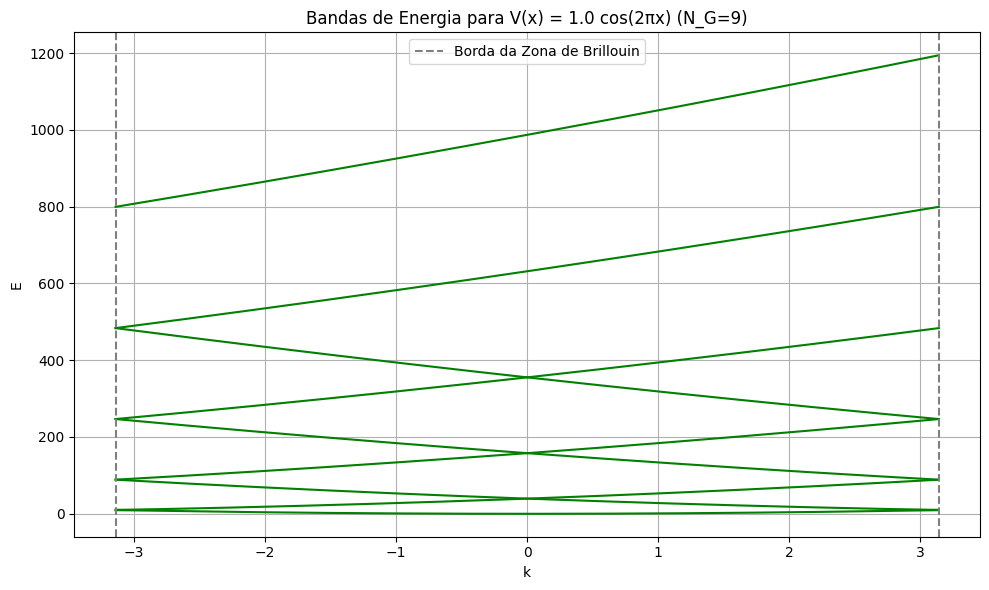


### Potencial: Gaussiana Única ###


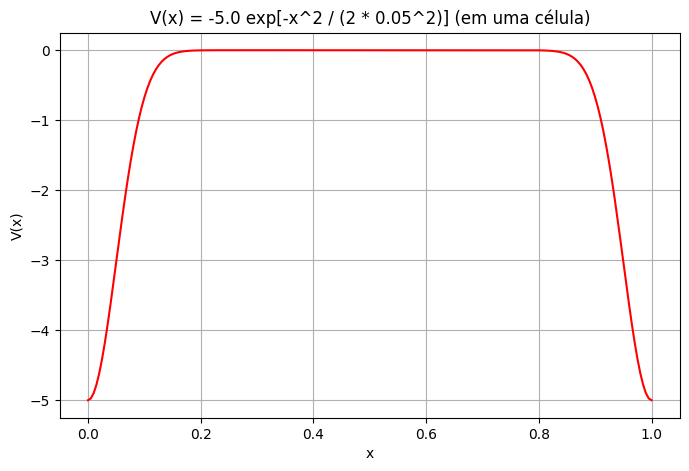


Matriz V_mn (parte real, arredondada) para Gaussiana Única:
[[-0.6267 -0.5965 -0.5144 -0.4019 -0.2845 -0.1825 -0.106  -0.0558 -0.0266]
 [-0.5965 -0.6267 -0.5965 -0.5144 -0.4019 -0.2845 -0.1825 -0.106  -0.0558]
 [-0.5144 -0.5965 -0.6267 -0.5965 -0.5144 -0.4019 -0.2845 -0.1825 -0.106 ]
 [-0.4019 -0.5144 -0.5965 -0.6267 -0.5965 -0.5144 -0.4019 -0.2845 -0.1825]
 [-0.2845 -0.4019 -0.5144 -0.5965 -0.6267 -0.5965 -0.5144 -0.4019 -0.2845]
 [-0.1825 -0.2845 -0.4019 -0.5144 -0.5965 -0.6267 -0.5965 -0.5144 -0.4019]
 [-0.106  -0.1825 -0.2845 -0.4019 -0.5144 -0.5965 -0.6267 -0.5965 -0.5144]
 [-0.0558 -0.106  -0.1825 -0.2845 -0.4019 -0.5144 -0.5965 -0.6267 -0.5965]
 [-0.0266 -0.0558 -0.106  -0.1825 -0.2845 -0.4019 -0.5144 -0.5965 -0.6267]]


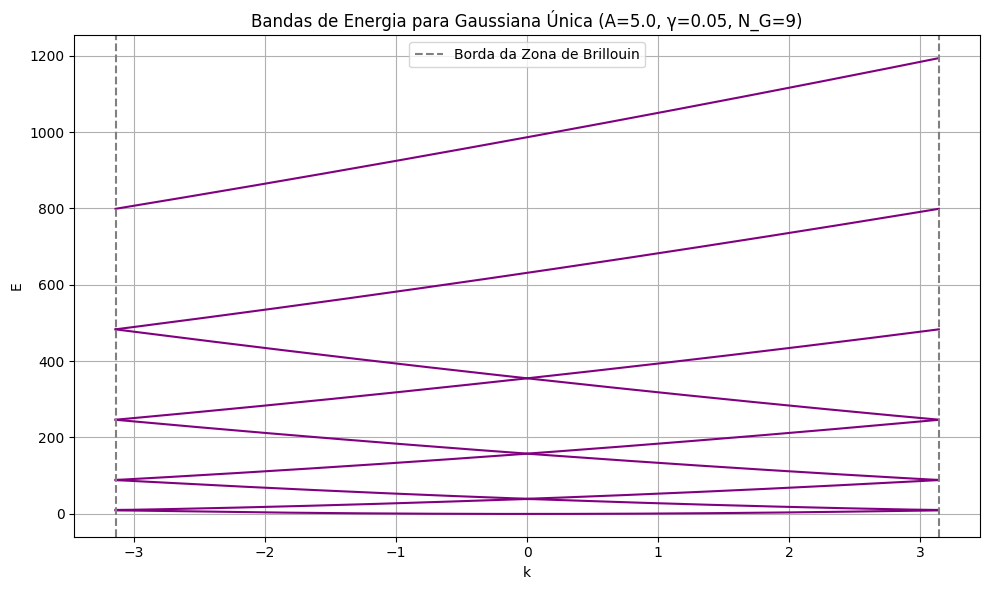


### Potencial: Gaussiana Dupla ###


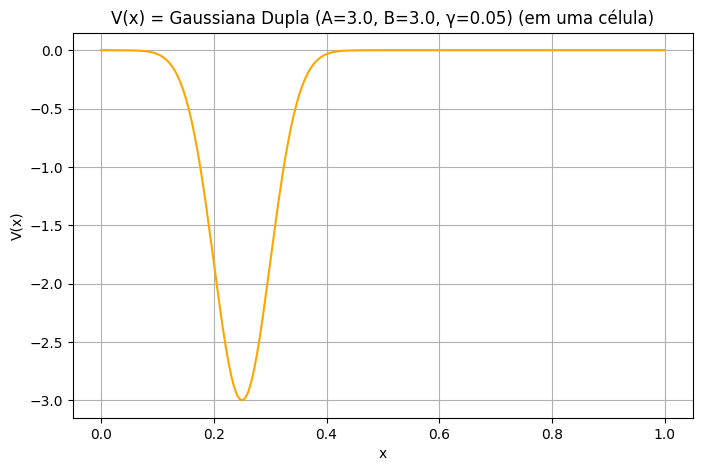


Matriz V_mn (parte real, arredondada) para Gaussiana Dupla:
[[-0.376   0.      0.3086  0.     -0.1707  0.      0.0636  0.     -0.016 ]
 [ 0.     -0.376   0.      0.3086  0.     -0.1707  0.      0.0636  0.    ]
 [ 0.3086  0.     -0.376   0.      0.3086  0.     -0.1707  0.      0.0636]
 [ 0.      0.3086  0.     -0.376   0.      0.3086  0.     -0.1707  0.    ]
 [-0.1707  0.      0.3086  0.     -0.376   0.      0.3086  0.     -0.1707]
 [ 0.     -0.1707  0.      0.3086  0.     -0.376   0.      0.3086  0.    ]
 [ 0.0636  0.     -0.1707  0.      0.3086  0.     -0.376   0.      0.3086]
 [ 0.      0.0636  0.     -0.1707  0.      0.3086  0.     -0.376   0.    ]
 [-0.016   0.      0.0636  0.     -0.1707  0.      0.3086  0.     -0.376 ]]


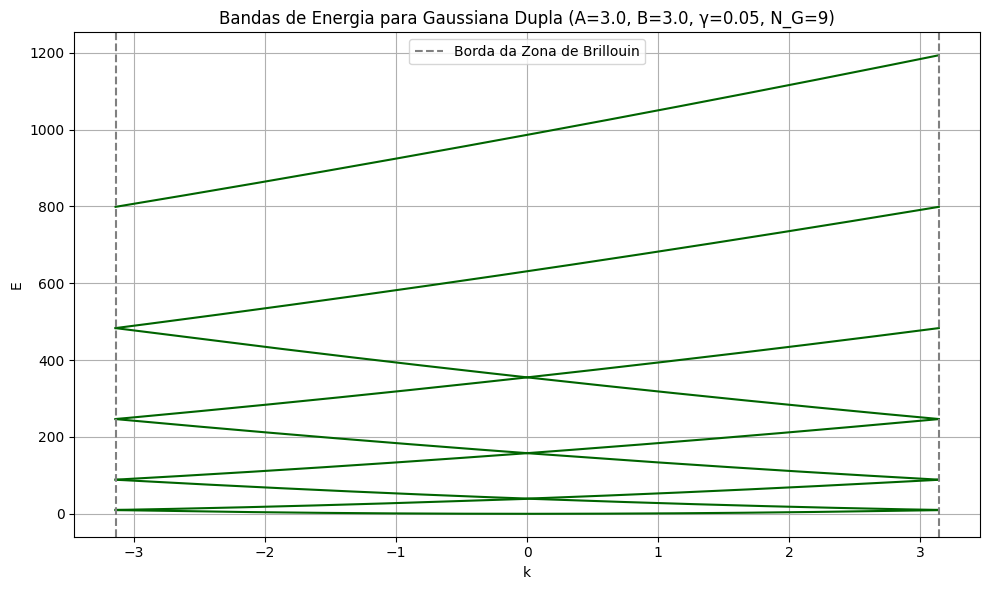

In [18]:
# --- Parâmetros Comuns para o Exercício 2 ---
k_points_ex2 = np.linspace(-np.pi, np.pi, 200) # Pontos de k na 1ª Zona de Brillouin
num_G_value_ex2 = 9 # Número de vetores G (tamanho da matriz). Aumente para mais bandas e precisão.
x_plot_vals_ex2 = np.linspace(0, 1, 200) # Intervalo [0,1] para plotar V(x) dentro de uma célula

print("\n--- Exercício 2: Cálculo das Bandas com V(x) Genérico ---")

# --- Cenário 1: Potencial Cosseno V(x) = A cos(2πx) ---
A_cosine_ex2 = 1.0 # Amplitude do potencial

print("\n### Potencial: V(x) = A cos(2πx) ###")

# Plotar V(x) para verificar
plt.figure(figsize=(8, 5))
plt.plot(x_plot_vals_ex2, [V_x_cosine(x, A_cosine_ex2) for x in x_plot_vals_ex2], color='blue')
plt.title(f'V(x) = {A_cosine_ex2} cos(2πx) (em uma célula)')
plt.xlabel('x')
plt.ylabel('V(x)')
plt.grid(True)
plt.show()

# Calcular a matriz V_mn para o potencial cosseno
V_mn_cos_ex2 = calculate_V_mn(V_x_cosine, num_G_value_ex2, A_cosine_ex2)

print("\nMatriz V_mn (parte real, arredondada) para V(x) = A cos(2πx):")
# Imprimir apenas a parte real, pois a parte imaginária deve ser próxima de zero para V(x) real.
print(np.round(V_mn_cos_ex2.real, 4))

# Comparar com alpha do Exercício 1
central_idx_ex2 = num_G_value_ex2 // 2
if central_idx_ex2 + 1 < num_G_value_ex2:
    alpha_comp_ex2 = V_mn_cos_ex2[central_idx_ex2, central_idx_ex2 + 1].real
    print(f"\nValor do acoplamento (V_m,n com m-n = +/-1): {alpha_comp_ex2:.4f}")
    print(f"Isto corresponde a alpha = A/2 = {A_cosine_ex2/2:.4f}")

# Calcular as bandas de energia
bands_cosine_ex2 = calculate_bands_from_Vmn(k_points_ex2, V_mn_cos_ex2, num_G_value_ex2)

# Plotar as bandas
plt.figure(figsize=(10, 6))
for band in bands_cosine_ex2:
    plt.plot(k_points_ex2, band, color='green')
plt.title(f'Bandas de Energia para V(x) = {A_cosine_ex2} cos(2πx) (N_G={num_G_value_ex2})')
plt.xlabel('k')
plt.ylabel('E')
plt.axvline(x=np.pi, color='gray', linestyle='--', label='Borda da Zona de Brillouin')
plt.axvline(x=-np.pi, color='gray', linestyle='--')
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()

# --- Cenário 2: Potencial Gaussiana Única ---
A_gaussian_ex2 = 5.0
gamma_gaussian_ex2 = 0.05 # Escolha um gamma pequeno para a gaussiana estar contida em [0,1]

print("\n### Potencial: Gaussiana Única ###")

# Plotar V(x) para verificar
plt.figure(figsize=(8, 5))
plt.plot(x_plot_vals_ex2, [V_x_gaussian_single(x, A_gaussian_ex2, gamma_gaussian_ex2) for x in x_plot_vals_ex2], color='red')
plt.title(f'V(x) = -{A_gaussian_ex2} exp[-x^2 / (2 * {gamma_gaussian_ex2}^2)] (em uma célula)')
plt.xlabel('x')
plt.ylabel('V(x)')
plt.grid(True)
plt.show()

# Calcular a matriz V_mn para a gaussiana única
V_mn_gaussian_single_ex2 = calculate_V_mn(V_x_gaussian_single, num_G_value_ex2, A_gaussian_ex2, gamma_gaussian_ex2)
print("\nMatriz V_mn (parte real, arredondada) para Gaussiana Única:")
print(np.round(V_mn_gaussian_single_ex2.real, 4)) # Imprimir parte real

# Calcular as bandas de energia
bands_gaussian_single_ex2 = calculate_bands_from_Vmn(k_points_ex2, V_mn_gaussian_single_ex2, num_G_value_ex2)

# Plotar as bandas
plt.figure(figsize=(10, 6))
for band in bands_gaussian_single_ex2:
    plt.plot(k_points_ex2, band, color='purple')
plt.title(f'Bandas de Energia para Gaussiana Única (A={A_gaussian_ex2}, γ={gamma_gaussian_ex2}, N_G={num_G_value_ex2})')
plt.xlabel('k')
plt.ylabel('E')
plt.axvline(x=np.pi, color='gray', linestyle='--', label='Borda da Zona de Brillouin')
plt.axvline(x=-np.pi, color='gray', linestyle='--')
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()

# --- Cenário 3: Potencial Gaussiana Dupla ---
A_double_gaussian_ex2 = 3.0
B_double_gaussian_ex2 = 3.0
gamma_double_gaussian_ex2 = 0.05

print("\n### Potencial: Gaussiana Dupla ###")

# Plotar V(x) para verificar
plt.figure(figsize=(8, 5))
plt.plot(x_plot_vals_ex2, [V_x_gaussian_double(x, A_double_gaussian_ex2, B_double_gaussian_ex2, gamma_double_gaussian_ex2) for x in x_plot_vals_ex2], color='orange')
plt.title(f'V(x) = Gaussiana Dupla (A={A_double_gaussian_ex2}, B={B_double_gaussian_ex2}, γ={gamma_double_gaussian_ex2}) (em uma célula)')
plt.xlabel('x')
plt.ylabel('V(x)')
plt.grid(True)
plt.show()

# Calcular a matriz V_mn para a gaussiana dupla
V_mn_gaussian_double_ex2 = calculate_V_mn(V_x_gaussian_double, num_G_value_ex2, A_double_gaussian_ex2, B_double_gaussian_ex2, gamma_double_gaussian_ex2)
print("\nMatriz V_mn (parte real, arredondada) para Gaussiana Dupla:")
print(np.round(V_mn_gaussian_double_ex2.real, 4)) # Imprimir parte real

# Calcular as bandas de energia
bands_gaussian_double_ex2 = calculate_bands_from_Vmn(k_points_ex2, V_mn_gaussian_double_ex2, num_G_value_ex2)

# Plotar as bandas
plt.figure(figsize=(10, 6))
for band in bands_gaussian_double_ex2:
    plt.plot(k_points_ex2, band, color='darkgreen')
plt.title(f'Bandas de Energia para Gaussiana Dupla (A={A_double_gaussian_ex2}, B={B_double_gaussian_ex2}, γ={gamma_double_gaussian_ex2}, N_G={num_G_value_ex2})')
plt.xlabel('k')
plt.ylabel('E')
plt.axvline(x=np.pi, color='gray', linestyle='--', label='Borda da Zona de Brillouin')
plt.axvline(x=-np.pi, color='gray', linestyle='--')
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()